### 1. 使用Dataset创建数据集

#### 1.1 根据Tensor创建数据集

In [3]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, Dataset, DataLoader, random_split

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [11]:
print(iris, len(iris['data']))

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [12]:
ds_iris = TensorDataset(torch.tensor(iris.data), torch.tensor(iris.target))

In [14]:
i = 0
for f, t in ds_iris:
    i += 1
    print('特征为:{}, 所对应的属性为: {}'.format(f, t))
print('总共的个数为:{}'.format(i))

特征为:tensor([5.1000, 3.5000, 1.4000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.9000, 3.0000, 1.4000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.7000, 3.2000, 1.3000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.6000, 3.1000, 1.5000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([5.0000, 3.6000, 1.4000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([5.4000, 3.9000, 1.7000, 0.4000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.6000, 3.4000, 1.4000, 0.3000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([5.0000, 3.4000, 1.5000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.4000, 2.9000, 1.4000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.9000, 3.1000, 1.5000, 0.1000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([5.4000, 3.7000, 1.5000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.8000, 3.4000, 1.6000, 0.2000], dtype=torch.float64), 所对应的属性为: 0
特征为:tensor([4.8000, 3.0000, 1.4000, 0.1000], dtype=torch.float64

In [16]:
# 分割训练集和预测集
n_train = int(len(ds_iris) * 0.8)
n_valid = len(ds_iris) - n_train
ds_train, ds_valid = random_split(ds_iris, [n_train, n_valid])

In [17]:
len(ds_train)

120

In [18]:
type(ds_train)

torch.utils.data.dataset.Subset

In [19]:
type(ds_iris)

torch.utils.data.dataset.TensorDataset

In [20]:
# 使用DataLoader加载数据集
dl_train, dl_valid = DataLoader(ds_train, batch_size = 8), DataLoader(ds_valid, batch_size = 8)

In [21]:
for features, labels in dl_train:
    print('训练集中的特征为:{},所对应的属性为:{}'.format(features, labels))
    break

训练集中的特征为:tensor([[6.8000, 2.8000, 4.8000, 1.4000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.6000, 2.7000, 4.2000, 1.3000],
        [6.2000, 2.2000, 4.5000, 1.5000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [6.4000, 3.2000, 5.3000, 2.3000],
        [5.9000, 3.2000, 4.8000, 1.8000]], dtype=torch.float64),所对应的属性为:tensor([1, 2, 2, 1, 1, 2, 2, 1], dtype=torch.int32)


In [24]:
print('调用Dataset的加法运算符(+)将多个数据集合并为一个数据集')
ds_data = ds_train + ds_valid
print('ds_train的个数为:{}, ds_valid的个数为:{}, ds_data的个数为:{}'.format(len(ds_train), len(ds_valid), len(ds_data)))

调用Dataset的加法运算符(+)将多个数据集合并为一个数据集
ds_train的个数为:120, ds_valid的个数为:30, ds_data的个数为:150


#### 1.2 根据图片目录创建图片数据集

In [5]:
import torch
import numpy as np
from torchvision import transforms, datasets
from torch.utils.data import TensorDataset, Dataset, DataLoader, random_split

In [2]:
print('演示一些常用的图片的操作')

演示一些常用的图片的操作


In [3]:
from PIL import Image

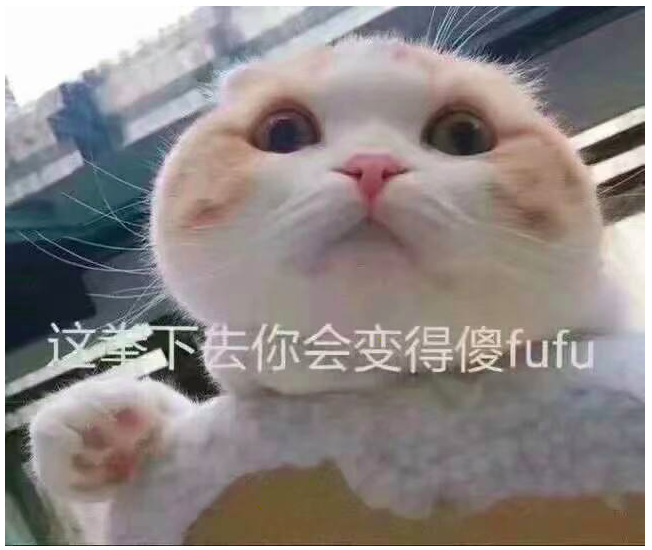

In [4]:
img = Image.open('5-1-cat.png')
img

随机数值进行翻转


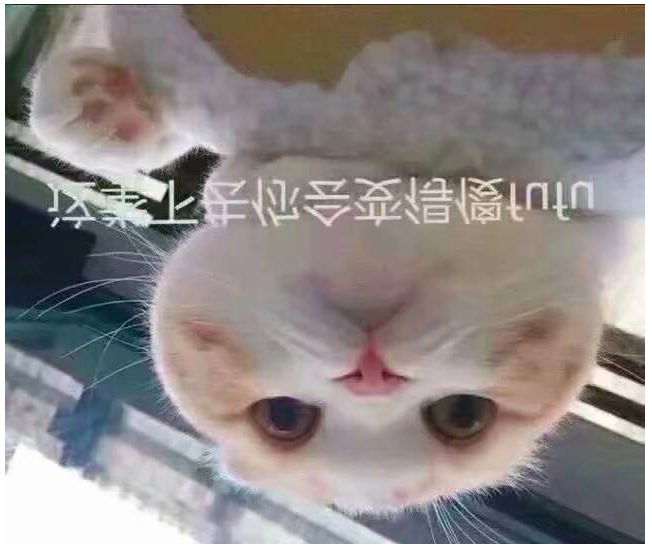

In [6]:
print('随机数值进行翻转')
transforms.RandomVerticalFlip()(img)

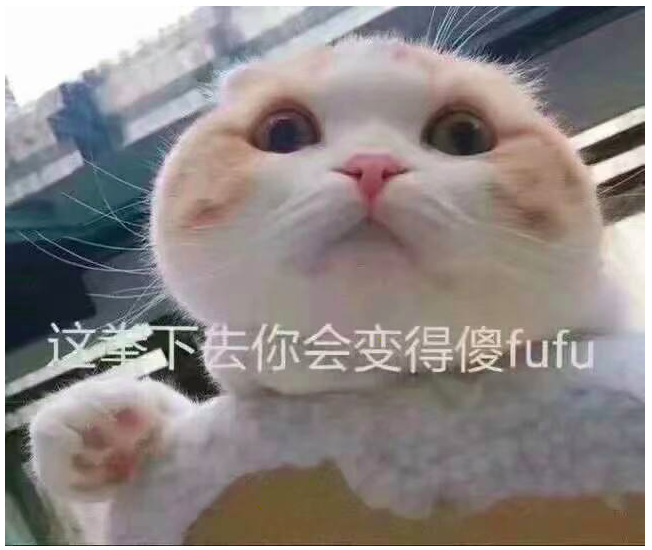

In [12]:
img

随机翻转45度


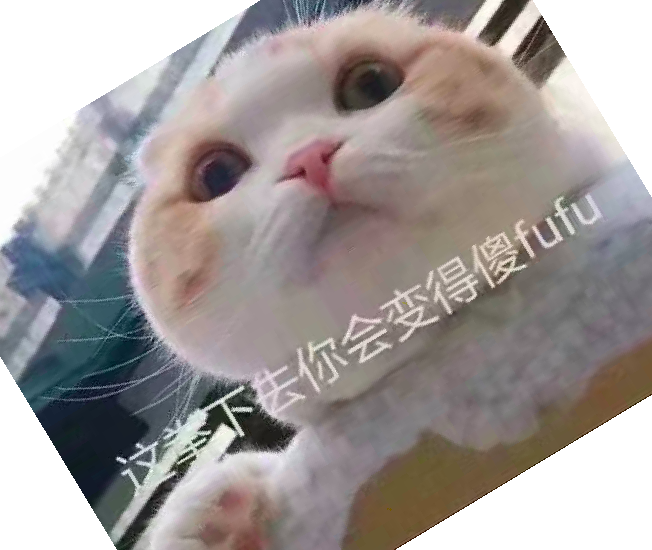

In [18]:
print('随机翻转45度')
transforms.RandomRotation(45)(img)

In [20]:
print('定义图片增强操作')
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(), # 随机水平翻转
    transforms.RandomVerticalFlip(), # 随机垂直翻转
    transforms.RandomRotation(45), # 随机在45度角度内旋转
    transforms.ToTensor() # 转换成张量
])
transform_valid = transforms.Compose([
    transforms.ToTensor()
])

定义图片增强操作


In [22]:
# 根据图片的目录创建数据集
ds_train = datasets.ImageFolder('./data/cifar2/train/', transform = transform_train, target_transform = lambda t: torch.tensor([t]).float())
ds_valid = datasets.ImageFolder('./data/cifar2/test/', transform = transform_train, target_transform = lambda t: torch.tensor([t]).float())

In [23]:
ds_train

Dataset ImageFolder
    Number of datapoints: 10000
    Root location: ./data/cifar2/train/
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-45.0, 45.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )
Target transform: <function <lambda> at 0x000002048F5EA430>

In [24]:
ds_train.class_to_idx

{'0_airplane': 0, '1_automobile': 1}

In [25]:
# 使用DataLoadder加载数据集
dl_train = DataLoader(ds_train, batch_size = 50, shuffle = True, num_workers = 3)
dl_valid = DataLoader(ds_valid, batch_size = 50, shuffle = True,num_workers = 3)

### 1.3 创建自定义数据集

In [30]:
print('创建imdb文本分类任务的自定义数据集')

创建imdb文本分类任务的自定义数据集


In [31]:
print('大致思路:')
print('1. 对训练集分词构建词典,然后将训练集和测试集文本数据转换为token单词编码')
print('2. 将转换为单词编码的训练集和测试集按样本分割成多个文件,一个文件代表一个样本')
print('3. 根据文件名列表获取对应序号的样本内容,从而创建Dataset数据集')

大致思路:
1. 对训练集分词构建词典,然后将训练集和测试集文本数据转换为token单词编码
2. 将转换为单词编码的训练集和测试集按样本分割成多个文件,一个文件代表一个样本
3. 根据文件名列表获取对应序号的样本内容,从而创建Dataset数据集


In [32]:
import numpy as np
import pandas as pd
import re, string
from collections import OrderedDict

In [33]:
MAX_WORDS = 10000 # 仅考虑最高词频的10000个词
MAX_LEN = 200 # 每个样本保留200个词的长度
BATCH_SIZE = 20

In [35]:
train_data_path = './data/imdb/train.tsv'
test_data_path = './data/imdb/test.tsv'
train_token_path = './data/imdb/train_token.tsv'
test_token_path = './data/imdb/test_token.tsv'
train_samples_path = './data/imdb/train_samples/'
test_samples_path = './data/imdb/test_samples/'

In [36]:
print('首先构建词典,并保留最高词频的MAX_WORDS个词')

首先构建词典,并保留最高词频的MAX_WORDS个词


In [37]:
s = "string. With. Punctuation?" # Sample string 
out = re.sub('[%s]' % re.escape(string.punctuation), '', s)
out

'string With Punctuation'

In [38]:
re.escape('www.python.org')

'www\\.python\\.org'

In [39]:
# 构建词典
word_count_dict = {}
# 清洗数据
def clean_text(text):
    lowcase = text.lower().replace('\n', '')
    stripped_html = re.sub('<br />', '', lowcase)
    cleaned_punctuation = re.sub('[%s]'%re.escape(string.punctuation), '', stripped_html)
    return cleaned_punctuation

In [40]:
with open(train_data_path, 'r', encoding = 'utf-8') as f:
    for line in f:
        label, text = line.split('\t')
        cleand_text = clean_text(text)
        for word in cleand_text.split(' '):
            word_count_dict[word] = word_count_dict.get(word, 0) + 1
word_count_dict

{'it': 61105,
 'really': 9260,
 'boggles': 17,
 'my': 9677,
 'mind': 1425,
 'when': 11141,
 'someone': 1775,
 'comes': 1969,
 'across': 771,
 'a': 128943,
 'movie': 33429,
 'like': 15579,
 'this': 58689,
 'and': 129170,
 'claims': 159,
 'to': 108052,
 'be': 21355,
 'one': 20078,
 'of': 116319,
 'the': 262789,
 'worst': 2140,
 'slasher': 363,
 'films': 6227,
 'out': 13064,
 'there': 11606,
 'is': 85413,
 'by': 17855,
 'far': 2267,
 'not': 24000,
 'still': 4354,
 'good': 11421,
 'but': 32750,
 'nonetheless': 109,
 'go': 3972,
 'see': 8889,
 'something': 3905,
 'death': 1438,
 'nurse': 83,
 'or': 14091,
 'blood': 891,
 'lake': 185,
 'then': 6210,
 'come': 2507,
 'back': 3789,
 'me': 8487,
 'tell': 1351,
 'if': 12596,
 'you': 23668,
 'think': 5791,
 'night': 1603,
 'brings': 510,
 'charlie': 321,
 'film': 30054,
 'has': 13435,
 'decent': 871,
 'camera': 1242,
 'work': 3238,
 'editing': 606,
 'which': 9423,
 'way': 6063,
 'more': 11363,
 'than': 7896,
 'i': 58120,
 'can': 8912,
 'say': 4309

In [41]:
df_word_dict = pd.DataFrame(pd.Series(word_count_dict, name = 'count'))
df_word_dict = df_word_dict.sort_values(by = 'count', ascending = False)
df_word_dict

,count
the,262789
and,129170
a,128943
of,116319
to,108052
...,...
detectiveaction,1
badassed,1
overwhelminga,1
officethere,1


In [42]:
df_word_dict = df_word_dict[0: MAX_WORDS - 2]
df_word_dict

,count
the,262789
and,129170
a,128943
of,116319
to,108052
...,...
putrid,24
shattered,24
grants,24
ethel,24


In [43]:
df_word_dict['word_id'] = range(2, MAX_WORDS) # 编号0和1分别留给未知词<unknow>和填充<paddding>
df_word_dict

C:\Users\lzf\AppData\Local\Temp/ipykernel_18804/1992870739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_word_dict['word_id'] = range(2, MAX_WORDS) # 编号0和1分别留给未知词<unknow>和填充<paddding>


,count,word_id
the,262789,2
and,129170,3
a,128943,4
of,116319,5
to,108052,6
...,...,...
putrid,24,9995
shattered,24,9996
grants,24,9997
ethel,24,9998


In [44]:
word_id_dict = df_word_dict['word_id'].to_dict()
word_id_dict

{'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'in': 8,
 'it': 9,
 'this': 10,
 'i': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'his': 23,
 'are': 24,
 'have': 25,
 'be': 26,
 'he': 27,
 'one': 28,
 'its': 29,
 'at': 30,
 'all': 31,
 'by': 32,
 '': 33,
 'an': 34,
 'they': 35,
 'from': 36,
 'who': 37,
 'like': 38,
 'so': 39,
 'her': 40,
 'or': 41,
 'just': 42,
 'about': 43,
 'has': 44,
 'out': 45,
 'if': 46,
 'some': 47,
 'what': 48,
 'there': 49,
 'good': 50,
 'more': 51,
 'when': 52,
 'very': 53,
 'she': 54,
 'even': 55,
 'no': 56,
 'would': 57,
 'up': 58,
 'my': 59,
 'only': 60,
 'which': 61,
 'time': 62,
 'really': 63,
 'story': 64,
 'their': 65,
 'were': 66,
 'had': 67,
 'can': 68,
 'see': 69,
 'me': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'get': 74,
 'been': 75,
 'will': 76,
 'well': 77,
 'into': 78,
 'people': 79,
 'because': 80,
 'other': 81,
 'do': 82,
 'also': 83,


In [45]:
df_word_dict.head(10)

,count,word_id
the,262789,2
and,129170,3
a,128943,4
of,116319,5
to,108052,6
is,85413,7
in,73951,8
it,61105,9
this,58689,10
i,58120,11


In [46]:
print('然后利用构建好的词典,将文本转换为token序号')

然后利用构建好的词典,将文本转换为token序号


In [47]:
# 转换token
# 填充文本
def pad(data_list, pad_length):
    padded_list = data_list.copy()
    if len(data_list) > pad_length:
        padded_list = data_list[-pad_length:]
    if len(data_list) < pad_length:
        padded_list = [1] * (pad_length - len(data_list)) +data_list
    return padded_list

In [48]:
def text_to_token(text_file, token_file):
    with open(text_file, 'r', encoding = 'utf-8') as fin, open(token_file, 'w', encoding = 'utf-8') as fount:
        for line in fin:
            label, text = line.split('\t')
            cleand_text = clean_text(text)
            word_token_list = [word_id_dict.get(word, 0) for word in cleand_text.split(' ')]
            pad_list = pad(word_token_list, MAX_LEN)
            out_line = label + '\t' + ''.join([str(x) for x in pad_list])
            fount.write(out_line + '\n')

In [53]:
text_to_token(train_data_path, train_token_path)
text_to_token(test_token_path, test_token_path)

In [50]:
print('接着将token文本按照样本分割,每个文件存放一个样本的数据')

接着将token文本按照样本分割,每个文件存放一个样本的数据


In [54]:
# 分割文本
import os
if not os.path.exists(train_samples_path):
    os.makedirs(train_data_path)
if not os.path.exists(test_samples_path):
    os.maketrans(test_samples_path)
def split_samples(token_path, samples_dir):
    with open(token_path, 'r', encoding = 'utf-8') as fin:
        i = 0
        for line in fin:
            with open(samples_dir+'%d.text'%i, 'w', encoding = 'utf-8') as fount:
                fount.write(line)
            i += 1

In [55]:
split_samples(train_token_path, train_samples_path)
split_samples(test_token_path, test_samples_path)

In [56]:
os.listdir(train_samples_path)[0:100]

['0.text',
 '1.text',
 '10.text',
 '100.text',
 '1000.text',
 '10000.text',
 '10001.text',
 '10002.text',
 '10003.text',
 '10004.text',
 '10005.text',
 '10006.text',
 '10007.text',
 '10008.text',
 '10009.text',
 '1001.text',
 '10010.text',
 '10011.text',
 '10012.text',
 '10013.text',
 '10014.text',
 '10015.text',
 '10016.text',
 '10017.text',
 '10018.text',
 '10019.text',
 '1002.text',
 '10020.text',
 '10021.text',
 '10022.text',
 '10023.text',
 '10024.text',
 '10025.text',
 '10026.text',
 '10027.text',
 '10028.text',
 '10029.text',
 '1003.text',
 '10030.text',
 '10031.text',
 '10032.text',
 '10033.text',
 '10034.text',
 '10035.text',
 '10036.text',
 '10037.text',
 '10038.text',
 '10039.text',
 '1004.text',
 '10040.text',
 '10041.text',
 '10042.text',
 '10043.text',
 '10044.text',
 '10045.text',
 '10046.text',
 '10047.text',
 '10048.text',
 '10049.text',
 '1005.text',
 '10050.text',
 '10051.text',
 '10052.text',
 '10053.text',
 '10054.text',
 '10055.text',
 '10056.text',
 '10057.text',

In [57]:
class imdbDataset(Dataset):
    def __init__(self, samples_dir):
        self.samples_dir = samples_dir
        self.samples_paths = os.listdir(samples_dir)
    
    def __len__(self):
        return len(self.samples_paths)
    
    def __getitem__(self, index):
        path = self.samples_dir + self.samples_paths[index]
        with open(path, 'r', encoding = 'utf-8') as f:
            line = f.readline()
            label, tokens = line.split('\t')
            label = torch.tensor([float(label)], dtype = torch.float)
            feature = torch.tensor([int(x) for x in tokens.split(' ')], dtype = tokens.long)
            return (feature, label)

In [58]:
ds_train = imdbDataset(train_samples_path)

In [61]:
ds_test = imdbDataset(test_samples_path)

In [60]:
len(ds_train), len(ds_test)

(20000, 0)